# Part 1: Implement Binary Search Tree 

We will begin by implementing binary search tree data structure in python. Please read the descriptions of functions carefully and complete them according to description. You should be familiar with objects in python. There are many tutorials online that you can use for this : https://www.tutorialspoint.com/python/python_classes_objects.htm

In [20]:
class Node: 
    # Implement a node of the binary search tree.
    # Constructor for a node with key and a given parent
    # parent can be None for a root node.
    def __init__(self, key, parent = None): 
        self.key = key
        self.parent = parent 
        self.left = None # We will set left and right child to None
        self.right = None
        # Make sure that the parent's left/right pointer
        # will point to the newly created node.
        if parent != None:
            if key < parent.key:
                assert(parent.left == None), 'parent already has a left child -- unable to create node'
                parent.left = self
            else: 
                assert key > parent.key, 'key is same as parent.key. We do not allow duplicate keys in a BST since it breaks some of the algorithms.'
                assert(parent.right == None ), 'parent already has a right child -- unable to create node'
                parent.right = self
        
    # Utility function that keeps traversing left until it finds 
    # the leftmost descendant
    def get_leftmost_descendant(self):
        if self.left != None:
            return self.left.get_leftmost_descendant()
        else:
            return self
    
    # TODO: Complete the search algorithm below
    # You can call search recursively on left or right child
    # as appropriate.
    # If search succeeds: return a tuple True and the node in the tree
    # with the key we are searching for.
    # Also note that if the search fails to find the key 
    # you should return a tuple False and the node which would
    # be the parent if we were to insert the key subsequently.
    def search(self, key):
        if self.key == key: 
            return (True, self)
        # your code here
        if key < self.key and self.left != None:
            return self.left.search(key)
        if key > self.key and self.right != None:
            return self.right.search(key)
        return (False, self)

        
    
    #TODO: Complete the insert algorithm below
    # To insert first search for it and find out
    # the parent whose child the currently inserted key will be.
    # Create a new node with that key and insert.
    # return None if key already exists in the tree.
    # return the new node corresponding to the inserted key otherwise.
    def insert(self, key):
        # your code here
        (found, parent) = self.search(key)
        if found:
            return None
        new_node = Node(key, parent)
        return new_node
        
        
    # TODO: Complete algorithm to compute height of the tree
    # height of a node whose children are both None is defined
    # to be 1.
    # height of any other node is 1 + maximum of the height 
    # of its children.
    # Return a number that is th eheight.
    def height(self):
        # your code here

        if self.left is not None:
            left_height = self.left.height()
        else:
            left_height = 0    
        if self.right is not None:
            right_height = self.right.height()
        else:
            right_height = 0    
        return max(left_height, right_height) + 1

        
    
    #TODO: Write an algorithm to delete a key in the tree.
    # First, find the node in the tree with the key.
    # Recommend drawing pictures to visualize these cases below before
    # programming.
    # Case 1: both children of the node are None
    #   -- in this case, deletion is easy: simply find out if the node with key is its
    #      parent's left/right child and set the corr. child to None in the parent node.
    # Case 2: one of the child is None and the other is not.
    #   -- replace the node with its only child. In other words,
    #      modify the parent of the child to be the to be deleted node's parent.
    #      also change the parent's left/right child appropriately.
    # Case 3: both children of the parent are not None.
    #    -- first find its successor (go one step right and all the way to the left).
    #    -- function get_leftmost_descendant may be helpful here.
    #    -- replace the key of the node by its successor.
    #    -- delete the successor node.
    # return: no return value specified
    
    def delete(self, key):
        (found, node_to_delete) = self.search(key)
        assert(found == True), f"key to be deleted:{key}- does not exist in the tree"
        # your code here
        
        if node_to_delete.left is None and node_to_delete.right is None:
            if node_to_delete.parent is None:
                return  # Deleting the root (no action needed)
            if node_to_delete.parent.left == node_to_delete:
                node_to_delete.parent.left = None
            else:
                node_to_delete.parent.right = None
        elif node_to_delete.left is None or node_to_delete.right is None:
            if node_to_delete.parent.left == node_to_delete:
                if node_to_delete.left:
                    node_to_delete.parent.left = node_to_delete.left
                    node_to_delete.left.parent = node_to_delete.parent
                else:
                    node_to_delete.parent.left = node_to_delete.right
                    node_to_delete.right.parent = node_to_delete.parent
            else:
                if node_to_delete.left:
                    node_to_delete.parent.right = node_to_delete.left
                    node_to_delete.left.parent = node_to_delete.parent
                else:
                    node_to_delete.parent.right = node_to_delete.right
                    node_to_delete.right.parent = node_to_delete.parent
        else:
            successor = node_to_delete.right.get_leftmost_descendant()
            node_to_delete.key = successor.key
            node_to_delete.right.delete(successor.key)
        

In [21]:
t1 = Node(25, None)
t2 = Node(12, t1)
t3 = Node(18, t2)
t4 = Node(40, t1)

print('-- Testing basic node construction (originally provided code) -- ')
assert(t1.left == t2), 'test 1 failed'
assert(t2.parent == t1),  'test 2 failed'
assert(t2.right == t3), 'test 3 failed'
assert (t3.parent == t2), 'test 4 failed'
assert(t1.right == t4), 'test 5 failed'
assert(t4.left == None), 'test 6 failed'
assert(t4.right == None), 'test 7 failed'
# The tree should be : 
#             25
#             /\
#         12     40
#         /\
#     None  18
#

print('-- Testing search -- ')
(b, found_node) = t1.search(18)
assert b and found_node.key == 18, 'test 8 failed'
(b, found_node) = t1.search(25)
assert b and found_node.key == 25, 'test 9 failed -- you should find the node with key 25 which is the root'
(b, found_node) = t1.search(26)
assert(not b), 'test 10 failed'
assert(found_node.key == 40), 'test 11 failed -- you should be returning the leaf node which would be the parent to the node you failed to find if it were to be inserted in the tree.'

print('-- Testing insert -- ')
ins_node = t1.insert(26)
assert ins_node.key == 26, ' test 12 failed '
assert ins_node.parent == t4,  ' test 13 failed '
assert t4.left == ins_node,  ' test 14 failed '

ins_node2 = t1.insert(33)
assert ins_node2.key == 33, 'test 15 failed'
assert ins_node2.parent == ins_node, 'test 16 failed'
assert ins_node.right == ins_node2, 'test 17 failed'

print('-- Testing height -- ')

assert t1.height() == 4, 'test 18 failed'
assert t4.height() == 3, 'test 19 failed'
assert t2.height() == 2, 'test 20 failed'

print('Success: 15 points.')

-- Testing basic node construction (originally provided code) -- 
-- Testing search -- 
-- Testing insert -- 
-- Testing height -- 
Success: 15 points.


In [22]:
# Testing deletion
t1 = Node(16, None)
# insert the nodes in the list
lst = [18,25,10, 14, 8, 22, 17, 12]
for elt in lst:
    t1.insert(elt)

# The tree should look like this
#               16
#            /     \
#          10      18
#        /  \     /  \
#       8   14   17  25
#          /         /  
#         12        22


# Let us test the three deletion cases.
# case 1 let's delete node 8
# node 8 does not have left or right children.
t1.delete(8) # should have both children nil.
(b8,n8) = t1.search(8)
assert not b8, 'Test A: deletion fails to delete node.'
(b,n) = t1.search(10)
assert( b) , 'Test B failed: search does not work'
assert n.left == None, 'Test C failed: Node 8 was not properly deleted.'

# Let us test deleting the node 14 whose right child is none.
# n is still pointing to the node 10 after deleting 8.
# let us ensure that it's right child is 14
assert n.right != None, 'Test D failed: node 10 should have right child 14'
assert n.right.key == 14, 'Test E failed: node 10 should have right child 14'

# Let's delete node 14
t1.delete(14)
(b14, n14) = t1.search(14)
assert not b14, 'Test F: Deletion of node 14 failed -- it still exists in the tree.'
(b,n) = t1.search(10)
assert n.right != None , 'Test G failed: deletion of node 14 not handled correctly'
assert n.right.key == 12, f'Test H failed: deletion of node 14 not handled correctly: {n.right.key}'

# Let's delete node 18 in the tree. 
# It should be replaced by 22.

t1.delete(18)
(b18, n18) = t1.search(18)
assert not b18, 'Test I: Deletion of node 18 failed'
assert t1.right.key == 22 , ' Test J: Replacement of node with successor failed.'
assert t1.right.right.left == None, ' Test K: replacement of node with successor failed -- you did not delete the successor leaf properly?'

print('-- All tests passed: 15 points!--')

-- All tests passed: 15 points!--


# Part 2: Height of Random Binary Search Trees

The height of a binary search tree depends on the order in which we insert the keys of the tree. In this problem, we investigate a curious link between the recursion depth of quicksort algorithm on an array of n elements and the depth of binary search trees.

Suppose we wish to insert keys the set of keys from $\{0, \ldots, n-1\}$ into a binary search tree. Answer the questions below.

### 2(A)
Provide examples of insertion sequences such that the resulting tree will have the worst possible  height of $n$. Note that the answer below will not be graded but you are encouraged to solve it and compare with the solutions.

YOUR ANSWER HERE

### 2(B) 
Let `s1,...,sj` be a sequence of $j \geq 1$ keys inserted, wherein each `si` is a number between `0` and `n-1` and each number in the sequence is unique.

Prove that if the sequence yields a tree of height `j` (worst possible case) then `s1` must be the minimum or maximum element in the sequence. 

**Hint:** Proof by contradiction will work. First note that `s1` will be the root of the tree obtained. Show that if `s1` is not the minimum or maximum then the resulting tree will have height < `n-1`). Note that the answer below will not be graded but you are encouraged to solve it and compare with the solutions.

YOUR ANSWER HERE

### 2(C)
Using the implementation of the binary search tree in part 1, complete the function `calculateAverageDepth(n, numTrials)` that performs the following experiment `numTrials` number of times.

Each experiment run is as follows:

- Take a list of numbers from 0 to n-1.
- Randomly shuffle the list: use random.shuffle function or (advanced) write your own shuffle.
- Insert the randomly shuffled list into a tree.
- Find and return the depth of the tree.

Finally, we run the experiment above `numTrials` times and take the average of all the trials.

We then plot the average depth of a random binary search tree as a function of n.


In [23]:
import random

# 1. make list of  numbers from 0 to n-1
# 2. randomly shuffle the list
# 3. insert the random list elements in order into a tree.
# 4. return the height of the resulting ree.
def run_single_experiment(n):
    # your code here
    # Step 1: Make a list of numbers from 0 to n-1
    numbers = list(range(n))

    # Step 2: Randomly shuffle the list
    random.shuffle(numbers)

    # Step 3: Insert the random list elements in order into a tree
    root = Node(numbers[0])
    for i in range(1, n):
        root.insert(numbers[i])

    # Step 4: Return the height of the resulting tree
    return root.height()
    
def run_multiple_trials(n, numTrials):
    lst_of_depths = [run_single_experiment(n) for j in range(numTrials)]
    return (sum(lst_of_depths)/len(lst_of_depths), lst_of_depths)
    

Average depth for 64 = 11.643
Average depth for 128 = 14.201
Passed all tests -- 15 points


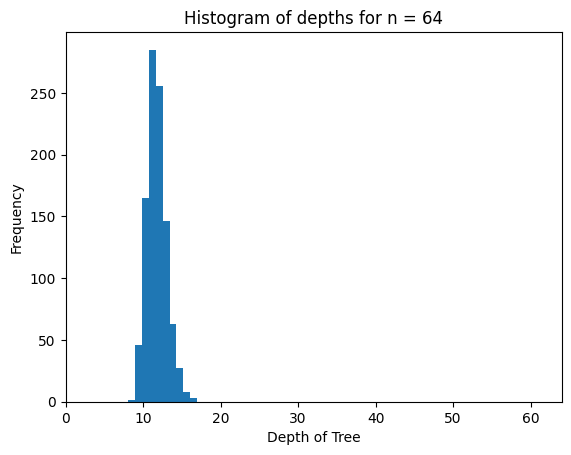

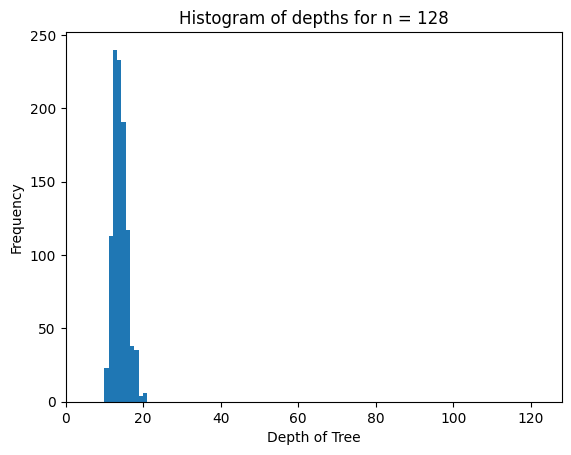

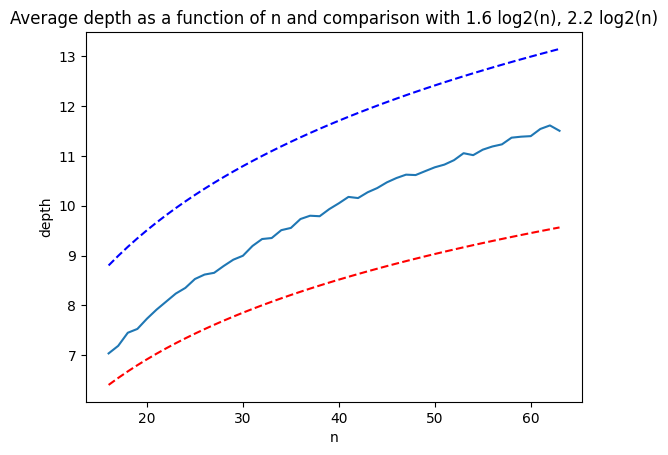

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import math 

(avg64, lst_of_results_64) = run_multiple_trials(64,1000)
plt.hist(lst_of_results_64)
plt.xlim(0,64)
plt.xlabel('Depth of Tree')
plt.ylabel('Frequency')
plt.title('Histogram of depths for n = 64')
print(f'Average depth for 64 = {avg64}')
assert avg64 <= 12 and avg64 >= 8

plt.figure()
(avg128, lst_of_results_128) = run_multiple_trials(128,1000)
print(f'Average depth for 128 = {avg128}')
assert avg128 <= 16 and avg128 >= 12


plt.hist(lst_of_results_128)
plt.xlim(0,128)
plt.xlabel('Depth of Tree')
plt.ylabel('Frequency')
plt.title('Histogram of depths for n = 128')

nmin=16
nmax=64

lst_of_average_depths = [ run_multiple_trials(j,1000)[0] for j in range(nmin,nmax)]
plt.figure()
l1 = plt.plot(range(nmin,nmax), lst_of_average_depths,label='Avg. Depth')
plt.xlabel('n')
plt.ylabel('depth')
l2 = plt.plot(range(nmin,nmax), [1.6* math.log(j)/math.log(2) for j in range(nmin,nmax)],'--r',label='1.6log2(n)')
l3 = plt.plot(range(nmin,nmax), [2.2* math.log(j)/math.log(2) for j in range(nmin,nmax)],'--b',label='2.2log2(n)')
#plt.legend(handles=[l1, l2, l3])
plt.title('Average depth as a function of n and comparison with 1.6 log2(n), 2.2 log2(n)')
print('Passed all tests -- 15 points')


The histograms and plots should show an amazing fact that although the worst case depth can be as large as $n$, the depth of a random binary search tree is concentrated between $1.8\log_2(n)$ and $2.2 \log_2(n)$.

This is interesting since if we can ensure that the keys are inserted at random, a BST can be quite well balanced with very high probability. There are many clever ideas on how this can be achieved in practice even if the user does not insert keys randomly. One way is called _treaps_, which we sometimes present in this class but decided to leave out for the coursera data-structures class. You can watch the treaps lecture here:
https://youtu.be/d0rlrRZc-0s

## Solutions to Manually Graded Problems

### 2(A)

Examples of worst case sequences include inserting in 
ascending order [0,1,...,n-1] or descending order [0,1,...,n-1].


### 2(B)

Assuming for the sake of contradition that s1 is not the least or maximum element. However, s1 will be the root of the tree. Then there must exist a non-zero number of elements that are in the left subtree of s1 and a non-zero number of elements in the right subtree. Therefore, the maximum size of any path from root to leaf must be strictly less than j. However, the height of the tree is j. Therefore, we obtain a contradiction.

